<a href="https://colab.research.google.com/github/SrutiElan/diabetes-classification/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up + Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Install required libraries
!pip install scikit-learn pandas numpy matplotlib seaborn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [16]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetes_data = pd.read_csv(url, names=column_names)

print(diabetes_data.head())
print(f"\nDataset shape: {diabetes_data.shape}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset shape: (768, 9)


# Section off
what you are doing!! ex: Load dataset, initial data exploration, target variable analysis, patterns


Good practice: commend ALL of your code. I better see that you understand each thing

In [19]:
# EDA BEGINS


diabetes_data.describe(include="all")
print(f"\nMissing values:\n{diabetes_data.isnull().sum()}")
print(f"\nClass distribution:\n{diabetes_data['Outcome'].value_counts()}")



Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Can minimum value of the belelow columns be zero?
Glucose
BloodPressure
SkinThickness
Insulin
BMI

It doesn't make sense. So let's replace the zeros with nan since after that counting them would be easier and zeros would be replaced with suitable values

In [20]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


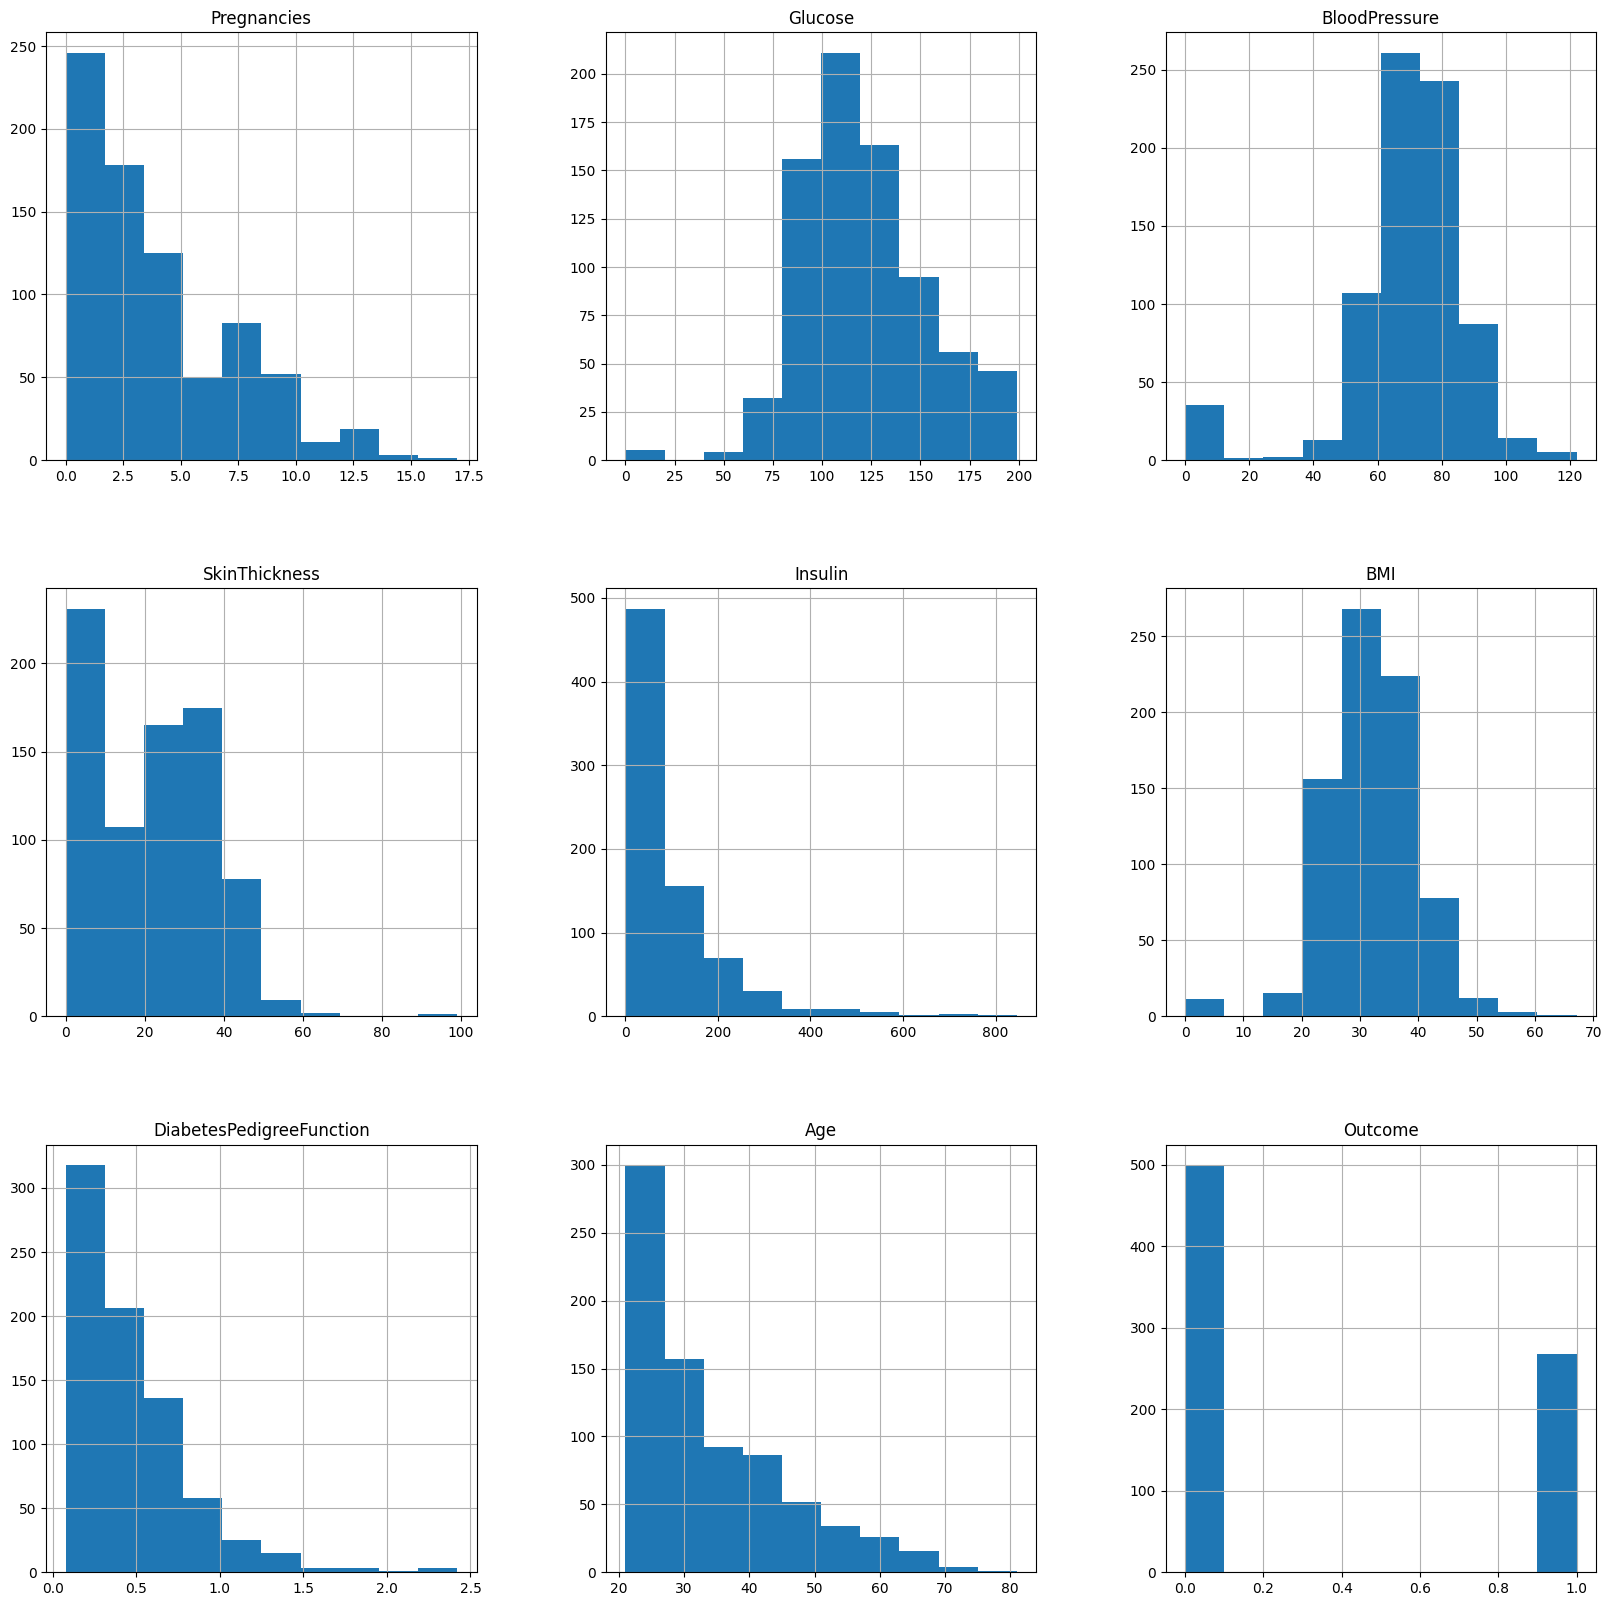

In [21]:
p = diabetes_data.hist(figsize = (20,20))


In [24]:
#Let's replace the nan values in the columns in
# accordance with their distribution (mean or median)
diabetes_data_copy.fillna({'Glucose': diabetes_data_copy['Glucose'].mean}, inplace= True)
diabetes_data_copy.fillna({'BloodPressure': diabetes_data_copy['BloodPressure'].mean}, inplace= True)
diabetes_data_copy.fillna({'SkinThickness': diabetes_data_copy['SkinThickness'].mean}, inplace= True)
diabetes_data_copy.fillna({'Insulin': diabetes_data_copy['Insulin'].mean}, inplace= True)
diabetes_data_copy.fillna({'BMI': diabetes_data_copy['BMI'].mean}, inplace= True)

# diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
# diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
# diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
# diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
# diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

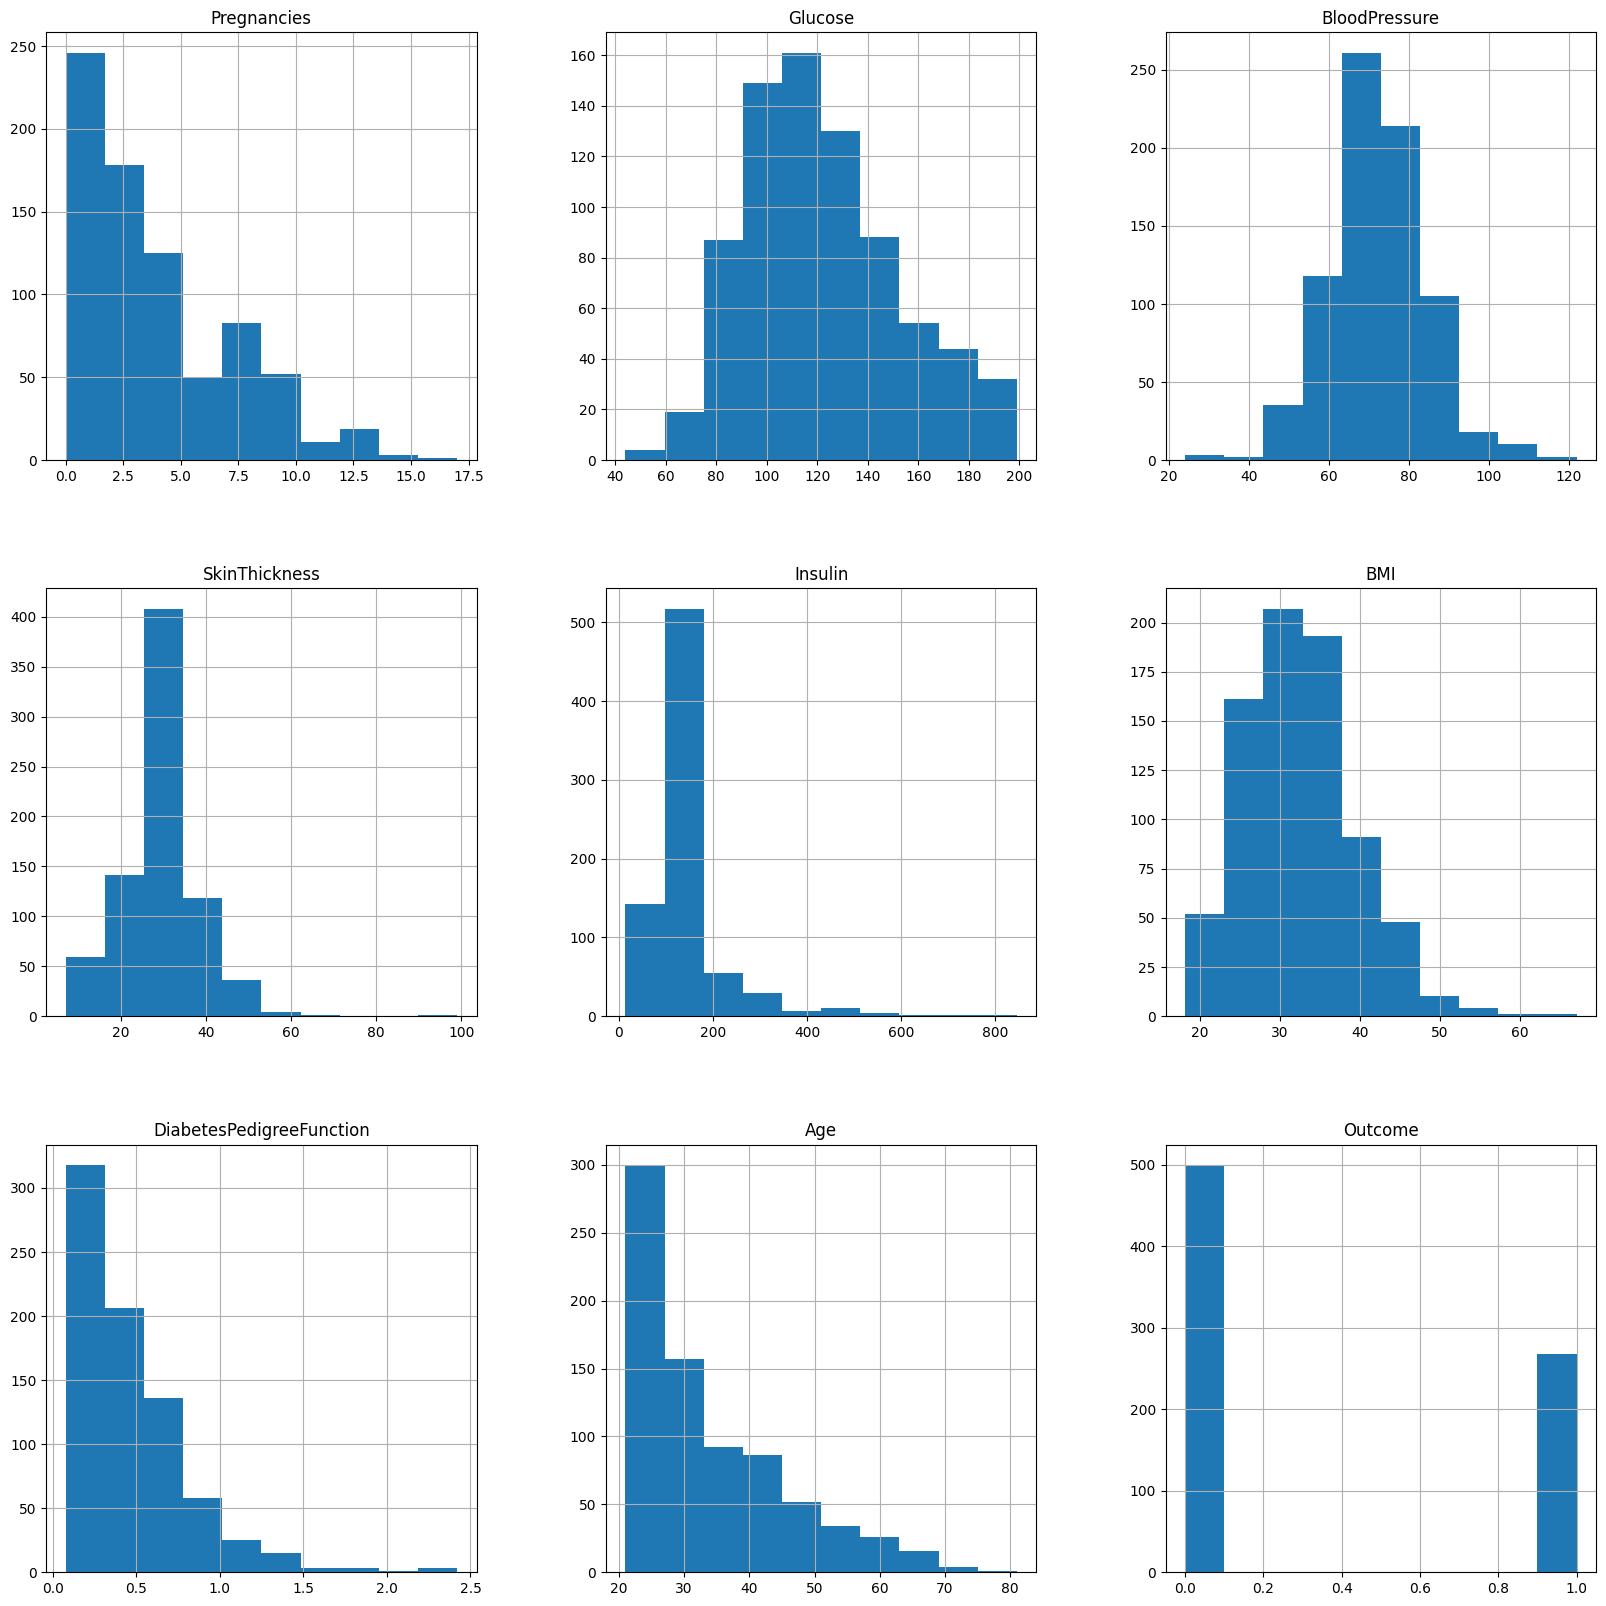

In [25]:
# Now plot after NAN removal

p = diabetes_data_copy.hist(figsize = (20,20))


In [26]:
diabetes_data.shape
#observing the shape of the data

(768, 9)